# Import data and packages

In [1]:
# Install packages (alphabetical order)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import prince
import re
from scipy.stats import normaltest
import seaborn as sns

att_names = []
prefix = "attr_"
for ii in range(21):
    att_names.append(prefix + str(ii))

data = pd.read_csv("statlog+german+credit+data/german.data", delimiter=" ", names=att_names)
data.head()

,attr_0,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,...,attr_11,attr_12,attr_13,attr_14,attr_15,attr_16,attr_17,attr_18,attr_19,attr_20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


# Exploration

In [2]:
# Summary of data (# of nulls and dtype)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   attr_0   1000 non-null   object
 1   attr_1   1000 non-null   int64 
 2   attr_2   1000 non-null   object
 3   attr_3   1000 non-null   object
 4   attr_4   1000 non-null   int64 
 5   attr_5   1000 non-null   object
 6   attr_6   1000 non-null   object
 7   attr_7   1000 non-null   int64 
 8   attr_8   1000 non-null   object
 9   attr_9   1000 non-null   object
 10  attr_10  1000 non-null   int64 
 11  attr_11  1000 non-null   object
 12  attr_12  1000 non-null   int64 
 13  attr_13  1000 non-null   object
 14  attr_14  1000 non-null   object
 15  attr_15  1000 non-null   int64 
 16  attr_16  1000 non-null   object
 17  attr_17  1000 non-null   int64 
 18  attr_18  1000 non-null   object
 19  attr_19  1000 non-null   object
 20  attr_20  1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 

In [3]:
# Data info (mean, std, intequartiles etc...)
data.describe()

,attr_1,attr_4,attr_7,attr_10,attr_12,attr_15,attr_17,attr_20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


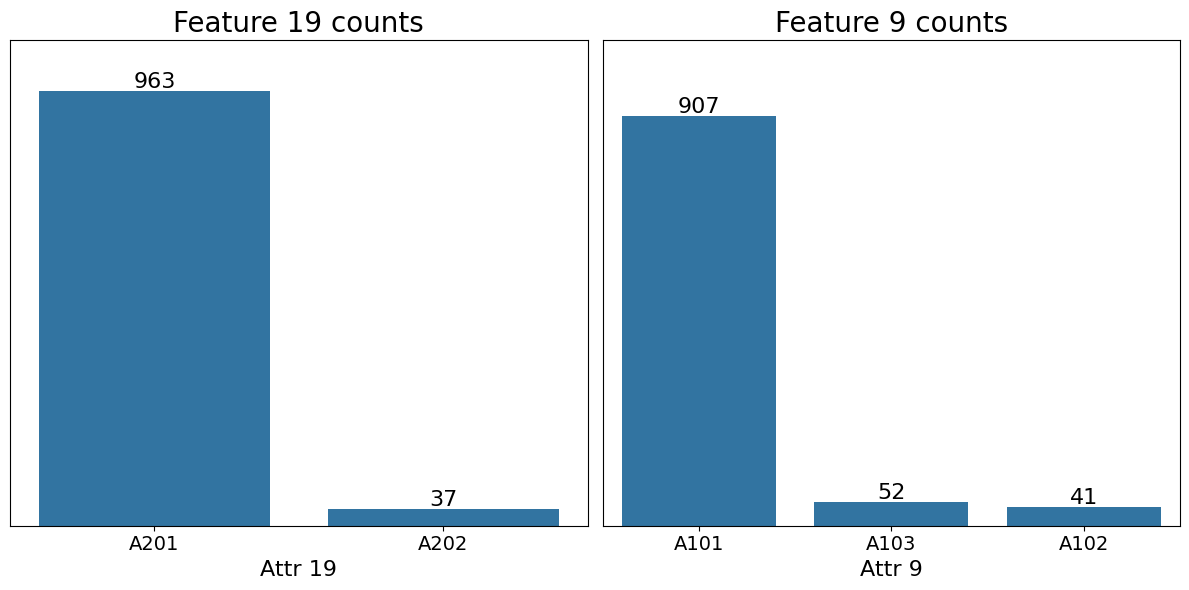

In [4]:
# Create subplots
figure, axes = plt.subplots(1, 2, figsize=(12, 6))

# First countplot
sns.countplot(x="attr_19", data=data, ax=axes[0], )
axes[0].set_title("Feature 19 counts", fontsize=20)
axes[0].set_xlabel("Attr 19", fontsize=16)

# Second countplot
sns.countplot(x="attr_9", data=data, ax=axes[1])
axes[1].set_title("Feature 9 counts", fontsize=20)
axes[1].set_xlabel("Attr 9", fontsize=16)

# Set y-axis limits for both plots
for ax in axes:
    ax.set_ylim(0, 1075)  # Set the y-axis range
    ax.grid(False)        # Remove grid lines
    ax.set_yticks([])     # Remove y-axis ticks
    ax.set_ylabel("")     # Remove y-axis label
    
    # Add value labels at the top of each bar
    for bar in ax.patches:
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
            bar.get_height() + 20,             # Y-coordinate (slightly above the bar)
            f"{int(bar.get_height())}",        # Label (bar height as integer)
            ha="center",                       # Align horizontally
            va="center",                       # Align vertically
            fontsize=16                         # Font size
        )

for ax in axes:
    ax.tick_params(axis='x', labelsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'attr_1'}>,
        <Axes: title={'center': 'attr_4'}>,
        <Axes: title={'center': 'attr_7'}>],
       [<Axes: title={'center': 'attr_10'}>,
        <Axes: title={'center': 'attr_12'}>,
        <Axes: title={'center': 'attr_15'}>],
       [<Axes: title={'center': 'attr_17'}>,
        <Axes: title={'center': 'attr_20'}>, <Axes: >]], dtype=object)

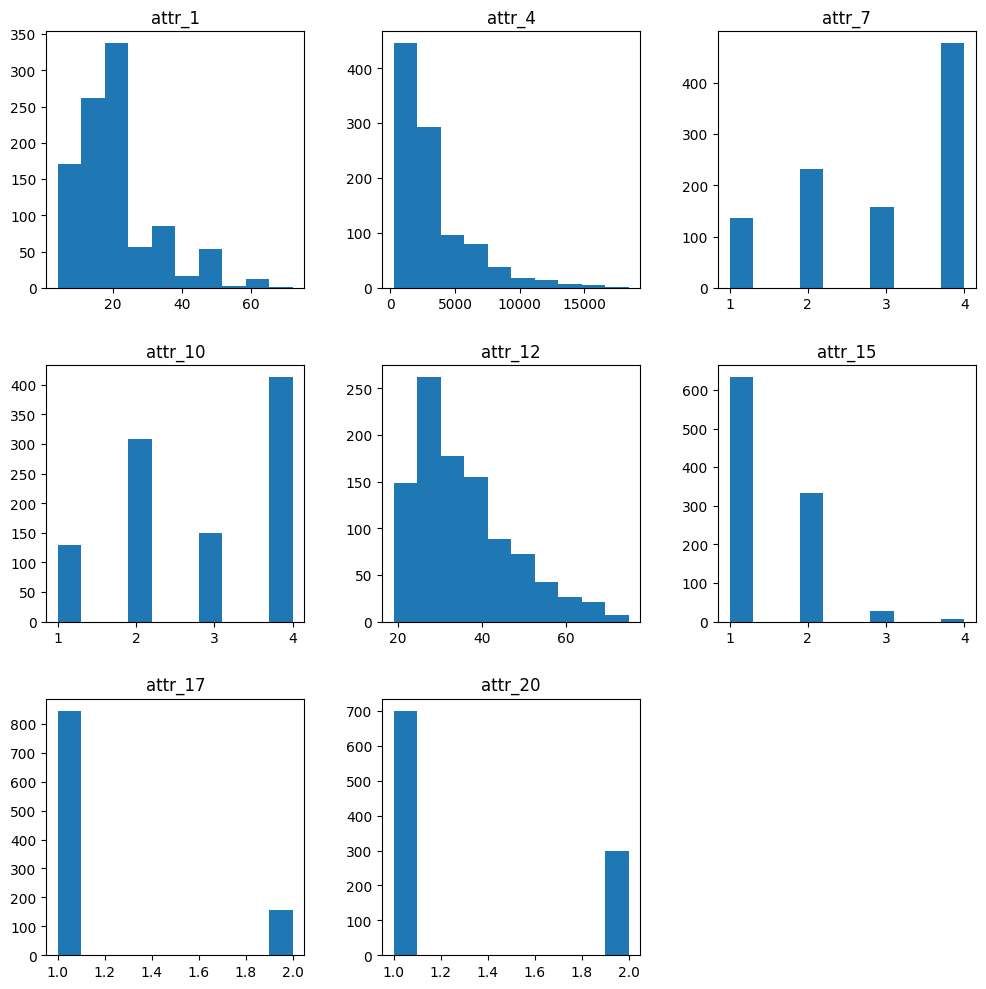

In [5]:
# Distributions of data
data.hist(figsize=(12,12), grid = False, xlabelsize = 10, )

We will need to remove the highly biased data (such as attributes 14, 17, 18 and 21) at the feature selection step. This data is not useful since we can consider that almost for all cases the value is the same, giving little to no information about the customer type.

From numerical data we can check for normal distributions of attributes 1, 4 and 12. In case they have low p-value we should try transforming it.

In [6]:
# Check for distribution of non-categorical values (attributes 1, 3 and 9)
p_value_1 = normaltest(data["attr_1"]).pvalue
p_value_4 = normaltest(data["attr_4"]).pvalue
p_value_12 = normaltest(data["attr_12"]).pvalue

# Print results
print(f"p-value of attribute 1: {p_value_1}")
print(f"p-value of attribute 3: {p_value_4}")
print(f"p-value of attribute 9: {p_value_12}")

p-value of attribute 1: 1.2980101391465855e-34
p-value of attribute 3: 1.0012332136508667e-86
p-value of attribute 9: 8.442041884948031e-30


From the distribution visualization of these 3 attributes is possible that it could be normalized by utilizing transformation as logarithms, square root or Box-Cox. If these surpass the p-value of 0.05 (and visually the histogram shows a more normal distribution) we keep it, otherwise leave it as it was.

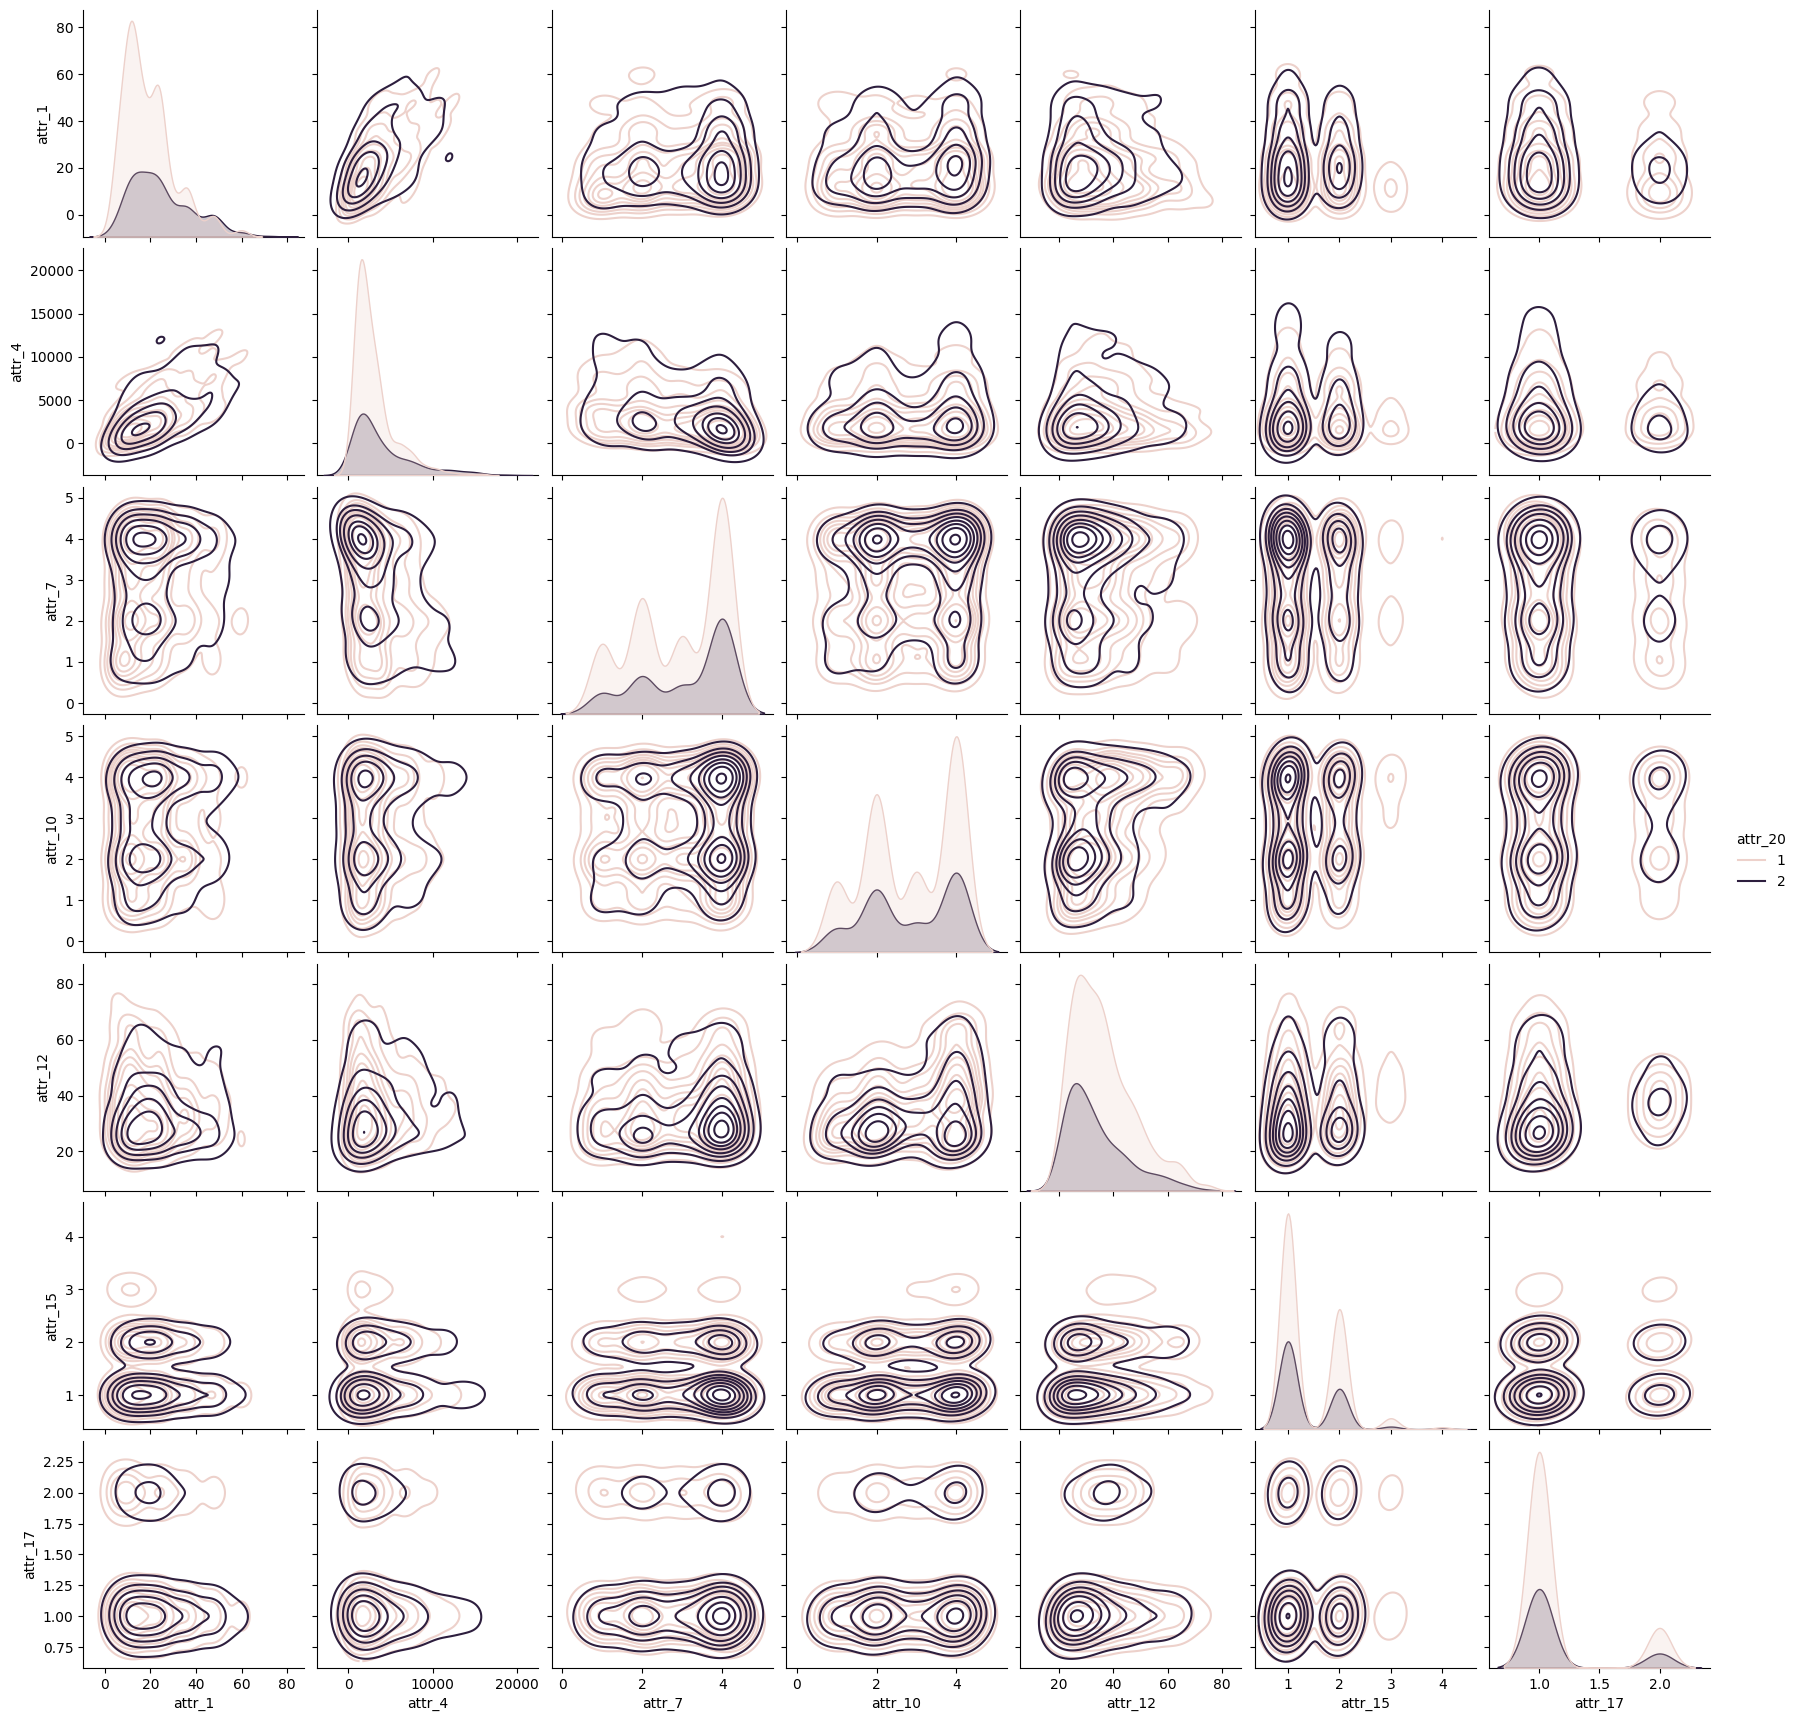

In [7]:
# Are there patterns between discrete features and target?
continuous_features = ["attr_1", "attr_4", "attr_12", "attr_20"]
discrete_features = [feature for feature in data.columns if feature not in continuous_features]

continuous_data = data[continuous_features]
discrete_data = pd.concat([data[discrete_features], data["attr_20"]], axis = 1) 

# Pair Plot
sns.pairplot(data, hue = "attr_20", kind = 'kde', )

In [8]:
# Are there outliers?

# Remove target
#continuous_data.drop(columns="attr_24", inplace = True)

# Calculate intequartile range
Q1_quantile = continuous_data.quantile(0.25)
Q3_quantile = continuous_data.quantile(0.75)
IQR= Q3_quantile - Q1_quantile

# Bounds
low_bound = Q1_quantile-1.5*IQR
up_bound = Q3_quantile+1.5*IQR

#Filter
continuous_data_filtered = continuous_data[(continuous_data > low_bound) & (continuous_data < up_bound)] 

continuous_data_filtered.dropna(inplace = True)

In [9]:
len(continuous_data_filtered)

853

We've seen there are around 150 rows that could be removed from the selection, lets see how many of these are bad customers

<Axes: >

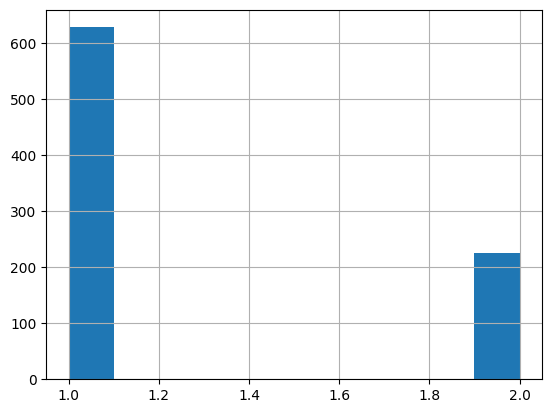

In [10]:
reduced_data = data.loc[continuous_data_filtered.index]
reduced_data["attr_20"].hist()

Seems the balance between good and bad customer remain similar, lets calculate the percentage (before it was 30%)

In [11]:
reduced_data[reduced_data["attr_20"]==2]["attr_20"].count()/reduced_data["attr_20"].count()

0.2637749120750293

The balance between good and bad customers remains similar, which causes little to no problem. For this reason we will use the reduced data.

# Preprocessing (Splits, feature selection and transformations)

### Feature Selection

In [12]:
data = data.loc[continuous_data_filtered.index]

In [13]:
# Remove biased data and remake the data_ohe dataset
data.drop(columns = ["attr_9", "attr_19"], inplace = True)
data = data.loc[continuous_data_filtered.index]
data.head()

,attr_0,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_10,attr_11,attr_12,attr_13,attr_14,attr_15,attr_16,attr_17,attr_18,attr_20
2,A14,12,A34,A46,2096,A61,A74,2,A93,3,A121,49,A143,A152,1,A172,2,A191,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,4,A124,53,A143,A153,2,A173,2,A191,2
6,A14,24,A32,A42,2835,A63,A75,3,A93,4,A122,53,A143,A152,1,A173,1,A191,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,2,A123,35,A143,A151,1,A174,1,A192,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,4,A121,61,A143,A152,1,A172,1,A191,1


### Split

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

# Differentiate between numerical and categorical features
numerical_features = [column for column in data.columns[:-1] if data[column].dtype != 'O']
categorical_features = [column for column in data.columns[:-1] if data[column].dtype == 'O']

# Label Categorical Data
ord_enc = OrdinalEncoder()
ord_enc.fit(data[categorical_features])

data[categorical_features] = ord_enc.transform(data[categorical_features])+1

# Split into feature and target
X = data[data.columns[:-1]]
y = data[data.columns[-1]]

# Split it into train and test (stratify since data is unbalanced)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 10, stratify=y)

### Transformations for normaltest

In [15]:
# Logaritmic transformations
attr_1_log = np.log(X_train["attr_1"])
attr_4_log = np.log(X_train["attr_4"])
attr_12_log = np.log(X_train["attr_12"])

# Check for distribution of non-categorical values (attributes 1, 3 and 9)
p_value_1_log = normaltest(attr_1_log).pvalue
p_value_4_log = normaltest(attr_4_log).pvalue
p_value_12_log = normaltest(attr_12_log).pvalue

# Print results
print(f"p-value of attribute 1: {p_value_1_log}")
print(f"p-value of attribute 3: {p_value_4_log}")
print(f"p-value of attribute 9: {p_value_12_log}")

p-value of attribute 1: 0.0001661207011745449
p-value of attribute 3: 0.30644934656278244
p-value of attribute 9: 7.844559368129223e-09


In [16]:
# Square Root transformations
attr_1_sqrt = np.sqrt(X_train["attr_1"])
attr_4_sqrt = np.sqrt(X_train["attr_4"])
attr_12_sqrt = np.sqrt(X_train["attr_12"])

# Check for distribution of non-categorical values (attributes 1, 3 and 9)
p_value_1_sqrt = normaltest(attr_1_sqrt).pvalue
p_value_4_sqrt = normaltest(attr_4_sqrt).pvalue
p_value_12_sqrt = normaltest(attr_12_sqrt).pvalue

# Print results
print(f"p-value of attribute 1: {p_value_1_sqrt}")
print(f"p-value of attribute 3: {p_value_4_sqrt}")
print(f"p-value of attribute 9: {p_value_12_sqrt}")

p-value of attribute 1: 1.809986330128943e-07
p-value of attribute 3: 1.4209726329533268e-07
p-value of attribute 9: 2.1637811396713385e-07


In [17]:
from scipy.stats import boxcox

# Box Cox transformations
attr_1_boxcox = boxcox(X_train["attr_1"])
attr_4_boxcox = boxcox(X_train["attr_4"])
attr_12_boxcox = boxcox(X_train["attr_12"])

# Check for distribution of non-categorical values (attributes 1, 3 and 9)
p_value_1_boxcox = normaltest(attr_1_boxcox[0]).pvalue
p_value_4_boxcox = normaltest(attr_4_boxcox[0]).pvalue
p_value_12_boxcox = normaltest(attr_12_boxcox[0]).pvalue

# Print results
print(f"p-value of attribute 1: {p_value_1_boxcox}")
print(f"p-value of attribute 3: {p_value_4_boxcox}")
print(f"p-value of attribute 9: {p_value_12_boxcox}")

p-value of attribute 1: 2.758672021020269e-06
p-value of attribute 3: 0.24681931797493553
p-value of attribute 9: 9.981342139339775e-13


From all seems that only attribute 3 could be transformed to a normal distribution. Moreover, the transformations that passed the p-value test are logaritmic and box-cox, lets visualize them.

<Axes: >

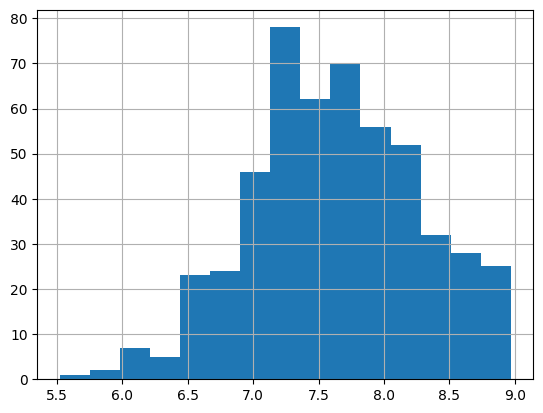

In [18]:
attr_4_log.hist(bins = 15)

(array([ 1.,  2.,  8.,  9., 24., 28., 66., 61., 68., 68., 49., 49., 28.,
        28., 22.]),
 array([ 6.50107346,  6.85058762,  7.20010178,  7.54961595,  7.89913011,
         8.24864427,  8.59815844,  8.9476726 ,  9.29718676,  9.64670093,
         9.99621509, 10.34572925, 10.69524342, 11.04475758, 11.39427174,
        11.74378591]),
 <BarContainer object of 15 artists>)

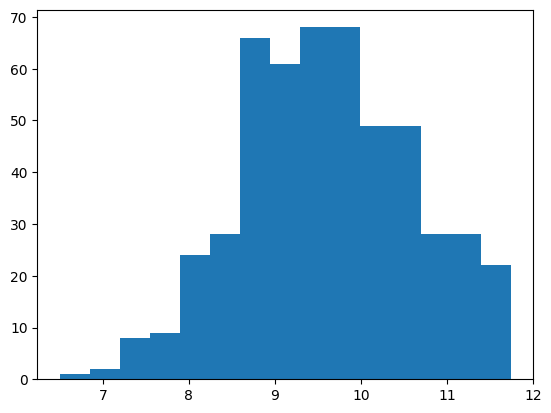

In [19]:
plt.hist(attr_4_boxcox[0], bins = 15)

Since they look pretty much the same, we will remain the logaritmic transformation since has a greater p-value.

<Axes: >

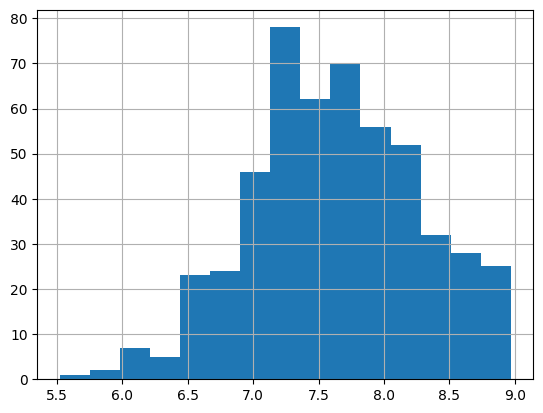

In [20]:
X_train["attr_4"] = np.log(X_train["attr_4"])
X_test["attr_4"] = np.log(X_test["attr_4"])
X_train["attr_4"].hist(bins = 15)

### Scale

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Create Scaler
mm_scaler = MinMaxScaler()

# Fit Scaler to train data

mm_scaler.fit(X_train[categorical_features])


# Transform train and test (avoid data leakage)
X_train[categorical_features] = mm_scaler.transform(X_train[categorical_features])
X_test[categorical_features] = mm_scaler.transform(X_test[categorical_features])

mm_scaler.fit(X_train[numerical_features])

X_train[numerical_features] = mm_scaler.transform(X_train[numerical_features])
X_test[numerical_features] = mm_scaler.transform(X_test[numerical_features])

# Transform targets to 0 and 1 instead of 1 and 2
y_train = y_train-1
y_test = y_test -1

# IDEA: Utilize weighted undirect quantum walk

1. Utilize the relationships between features to create a weighted graph with each feature as a node.
     1. Categotical vs Categorical utilize Cramers V (If this doesn't work well try Theil's U)
     2. Numerical vs Numerical utilize Pearson (We can also try Euler's distance)
     3. Categorical vs Numerical utilize Mutual Information statistics (try ANOVA-F if this doesn't works)
     4. With the "Covariance" Matrix, build the weighted graph with each feature as a node and each correlation as the weight.
     6. ***Notice: To avoid any bias towards self-path we will set the correlation between features j and j as 0, i.e., the diagonal will be 0's instead of 1s.
2. Initialize the state by RY rotations on each qubit dependant on the feature value from 0 to 1 (0 -> 0, 1 -> $\pi$)
3. With the graph, utilize each node as a qubit and utilize the weights to get 2 Hamiltonians:
     1. The odd hamiltonians will be composed of at most $N$ $Z_{i}\otimes Z_{j}$ terms where $N$ are the number of nodes. Each term will be accompanied by a weight $\omega_{i}$ where $\omega_{i}$ is the $k$-th stronger correlation which feature $i$ has among all features. 
     2. The even hamiltonians will be composed of $N$ $X_{i}\otimes X_{j}$ terms where $N$ are the number of nodes. Each term will be accompanied by a weight $\upsilon_{i}$ where $\upsilon_{i}$ is the $k$-th stronger correlation which feature $i$ has among all features.
     3. ***Notice: If two features $i$ and $j$ are mutually the stronger correlations we will only consider one. (We can alternate between $Z\otimes Z$ and $X\otimes X$ terms for each subsequential correlation)***
4. Evolve the system for a time $\pi$ (this can be done on dwave's qcomputers or by gate-based computers)
5. Calculate expected value of $Z\otimes Z \otimes ... \otimes Z$
6. Apply linear regression
---
Eg. *For 4 features with covariance matrix:* 
$$
    corr = \begin{pmatrix}
        0 & 0.6 & 0.4 & 0.1\\
        0.6 & 0 & 0.7 & 0.5\\
        0.4 & 0.7 & 0 & 0.8\\
        0.1 & 0.5 & 0.8 & 0
    \end{pmatrix}
$$

*The equivalent hamiltonian (Proposed) would be:*
$$ \hat{H}_{1} = 0.6\sigma_{z_{1}}\otimes\sigma_{z_{2}} + 0.7\sigma_{z_{2}} \otimes \sigma_{z_{3}} + 0.8\sigma_{z_{3}} \otimes \sigma_{z_{4}}$$
$$\hat{H}_{2} = 0.4\sigma_{y_{1}}\otimes\sigma_{y_{3}} + 0.6\sigma_{y_{2}} \otimes \sigma_{y_{1}} + 0.7\sigma_{y_{3}} \otimes \sigma_{y_{2}} + 0.5\sigma_{y_{4}} \otimes \sigma_{y_{2}}$$
*Then the evolution of the system for a time "t" would be:*
$$U(t) = e^{-i\hat{H_{2}}t}e^{-i\hat{H_{1}}t}$$

# Get Correlation Matrix

In [22]:
from scipy.stats import pearsonr, pointbiserialr
from scipy.stats.contingency import association
import numpy as np
import pandas as pd

# Example data: df with 56 features
correlation_matrix = pd.DataFrame(index=X_train.columns, columns=X_train.columns, dtype = "float64")

for col1 in X_train.columns:
    for col2 in X_train.columns:
        if col1 == col2:
            correlation_matrix.loc[col1, col2] = 0
        elif col1 in categorical_features and col2 in categorical_features:
            # Categorical association (Cramér's V)
            contingency_table = pd.crosstab(X_train[col1], X_train[col2])
            correlation_matrix.loc[col1, col2] = np.float64(association(contingency_table, method='cramer'))
        elif col1 in numerical_features and col2 in numerical_features:
            # Continuous association (Pearson)
            corr, _ = pearsonr(X_train[col1], X_train[col2])
            correlation_matrix.loc[col1, col2] = corr
        else:
            # Mixed association (Mutual Information)
            correlation_matrix.loc[col1, col2] = np.float64(pointbiserialr(X_train[col1], X_train[col2])[0])

# Since point biserial and pearson goes from -1 to 1 we will take the absolute value
correlation_matrix = correlation_matrix.abs()

correlation_matrix

,attr_0,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_10,attr_11,attr_12,attr_13,attr_14,attr_15,attr_16,attr_17,attr_18
attr_0,0.000000,0.052375,0.138797,0.178842,0.015193,0.169954,0.116267,0.063628,0.110502,0.015799,0.081708,0.140138,0.098924,0.097789,0.103759,0.054987,0.028402,0.095940
attr_1,0.052375,0.000000,0.023266,0.029274,0.533204,0.034521,0.087845,0.208572,0.016452,0.057114,0.256008,0.048513,0.007965,0.084371,0.031765,0.215006,0.076177,0.149914
attr_2,0.138797,0.023266,0.000000,0.175263,0.124733,0.109486,0.104764,0.037927,0.103873,0.100041,0.076894,0.157090,0.252282,0.090608,0.560514,0.107531,0.020688,0.074995
attr_3,0.178842,0.029274,0.175263,0.000000,0.074103,0.145231,0.136553,0.062952,0.173383,0.106411,0.189000,0.062011,0.156190,0.216427,0.017368,0.199423,0.063768,0.232493
attr_4,0.015193,0.533204,0.124733,0.074103,0.000000,0.060317,0.004405,0.271897,0.033857,0.027289,0.195815,0.058685,0.077393,0.053393,0.089624,0.237696,0.029729,0.209999
attr_5,0.169954,0.034521,0.109486,0.145231,0.060317,0.000000,0.106244,0.021214,0.089885,0.131124,0.105693,0.135630,0.054223,0.061504,0.049001,0.066580,0.038931,0.089747
attr_6,0.116267,0.087845,0.104764,0.136553,0.004405,0.106244,0.000000,0.119902,0.211575,0.241734,0.157570,0.326011,0.104594,0.202300,0.073711,0.333235,0.080510,0.130357
attr_7,0.063628,0.208572,0.037927,0.062952,0.271897,0.021214,0.119902,0.000000,0.134932,0.014303,0.094980,0.062455,0.060394,0.149390,0.007028,0.153653,0.031356,0.046047
attr_8,0.110502,0.016452,0.103873,0.173383,0.033857,0.089885,0.211575,0.134932,0.000000,0.071828,0.095010,0.029830,0.067429,0.179089,0.072786,0.127073,0.123870,0.121125
attr_10,0.015799,0.057114,0.100041,0.106411,0.027289,0.131124,0.241734,0.014303,0.071828,0.000000,0.101608,0.278579,0.039248,0.051175,0.008231,0.015864,0.034533,0.171001


# Create Quantum Circuit

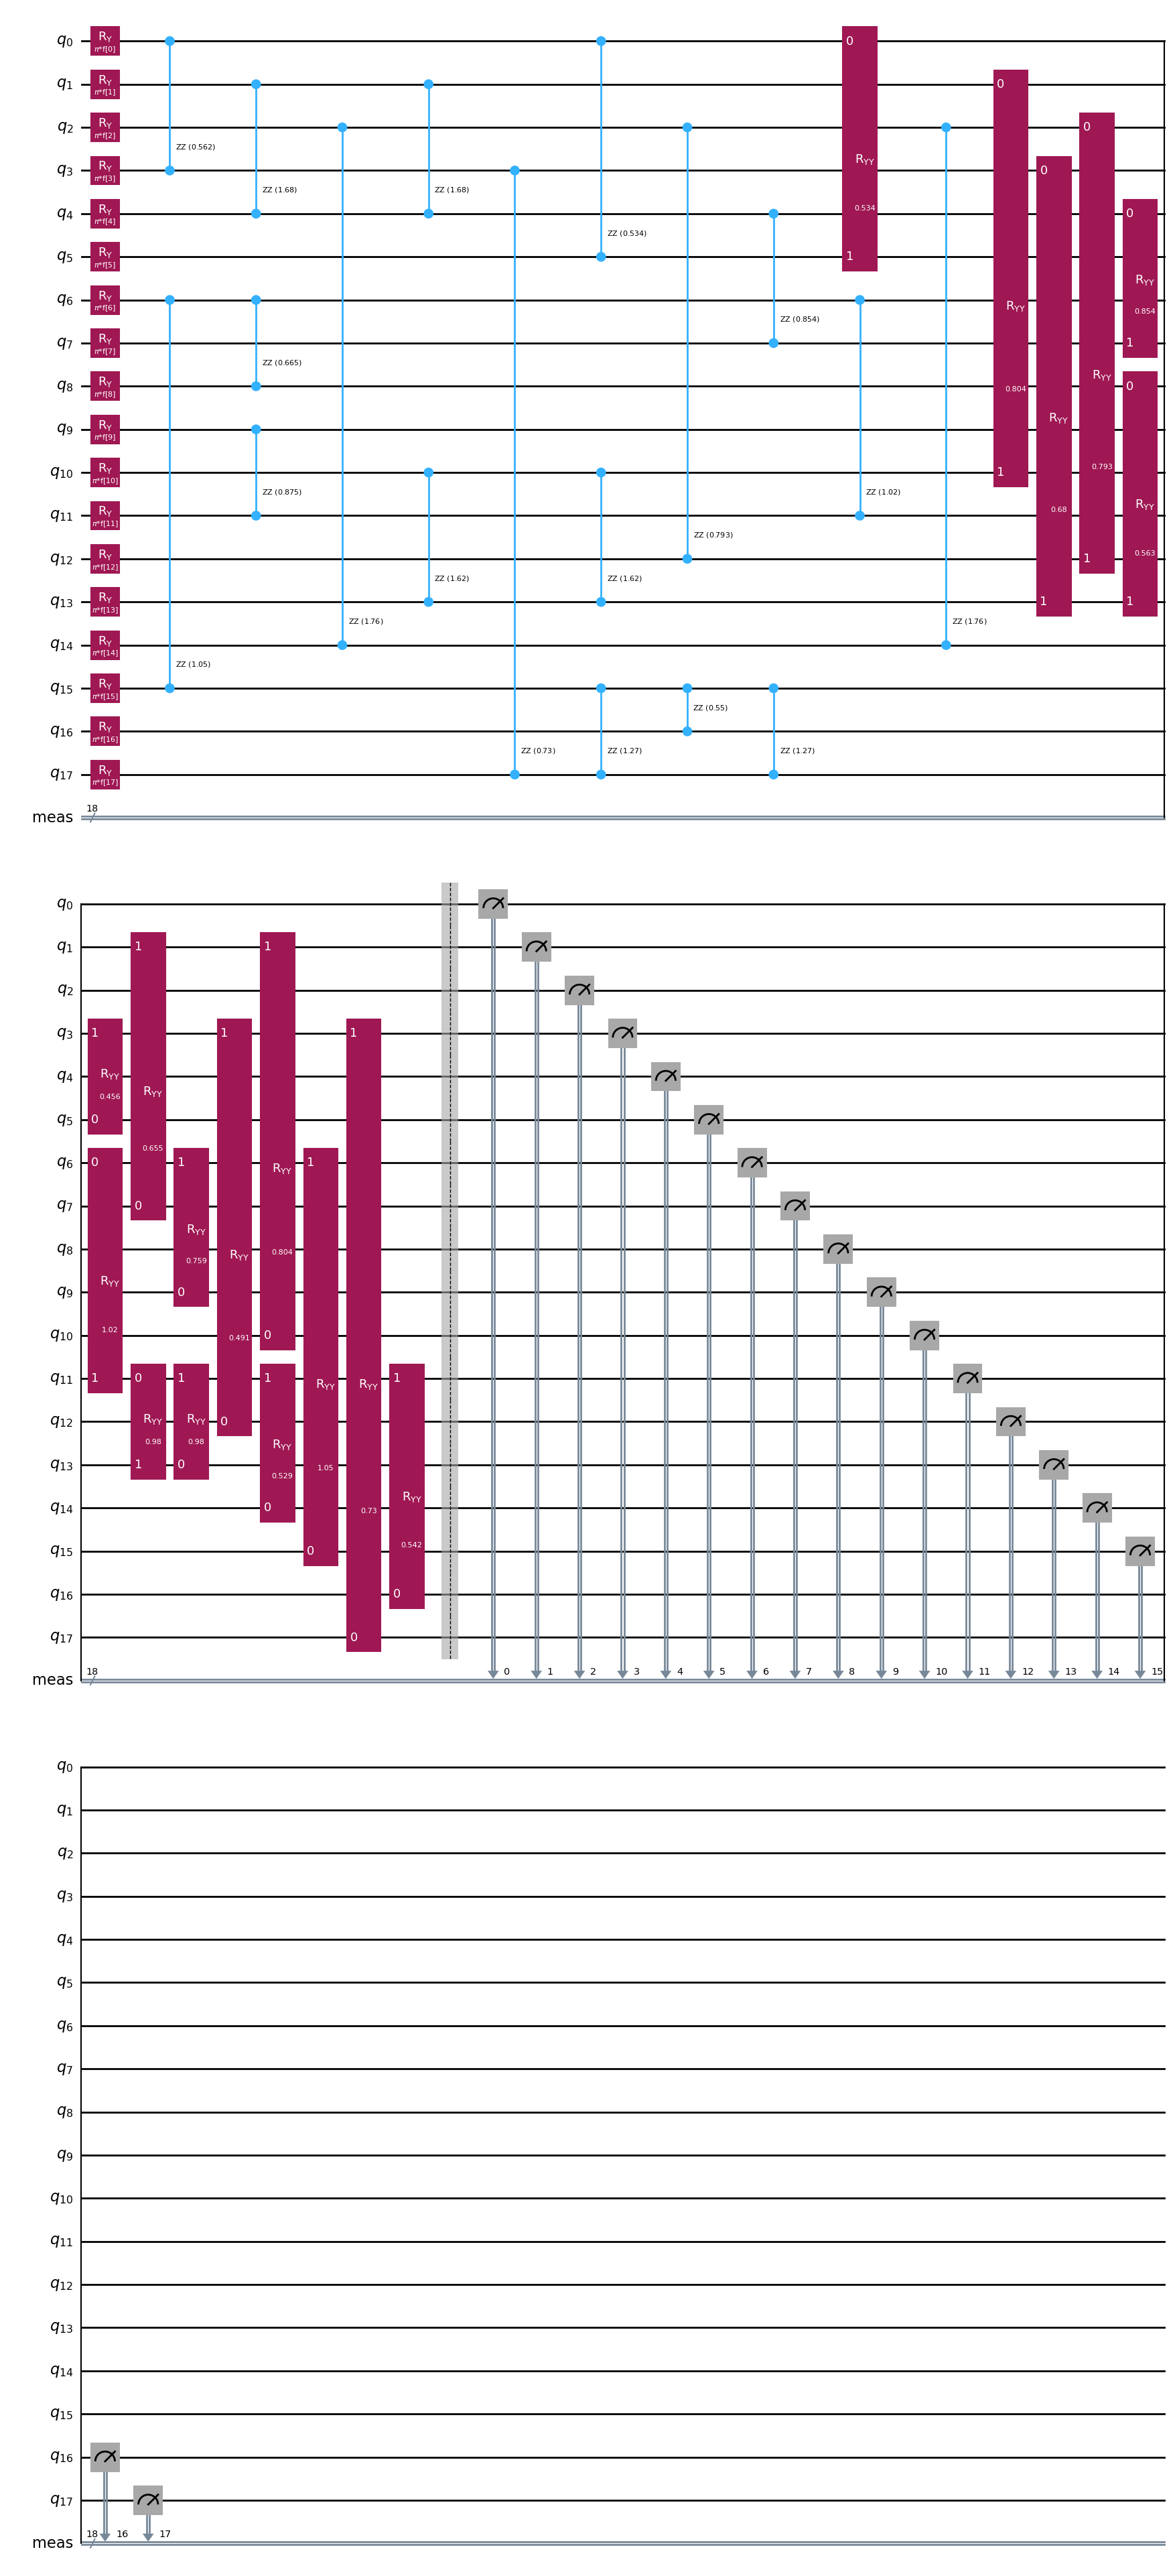

In [23]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import RXXGate, RYYGate, RZZGate

# Parameterized quantum circuit
def qrc(corr_mat, n_layers, rot1, rot2):

    # Get a list of lists indicating the first "n_layers" max values and their corresponding attributes.
    cols = list(corr_mat.columns)
    n_qubits = len(cols)
    features = ParameterVector(name = "f", length = len(cols))

    max_corr_vals = []
    max_corr_indx = []
    for ii in range(1, n_layers+1):
        max_corr_vals_ii = []
        max_corr_indx_ii = []
        for col in cols:
            col2 = corr_mat[col].nlargest(ii).index[ii-1]
            col2_inv = corr_mat[col2].nlargest(ii).index[ii-1]

            max_corr_indx_ii.append(col2)
            val = corr_mat[col].nlargest(ii).iloc[ii-1]
            if col2 == col2_inv:
                max_corr_vals_ii.append(val/2)
            else:
                max_corr_vals_ii.append(val)

        max_corr_vals.append(max_corr_vals_ii)
        max_corr_indx.append(max_corr_indx_ii)

    
    # Create Quantum Circuit
    qc = QuantumCircuit(n_qubits)
    
    # Initialize featuremap layer
    for ii in range(n_qubits):
        qc.ry(features[ii]*np.pi, ii)

    # Add RZZ or RXX rotations based on the max_corr_vals and max_corr_indx
    for ii in range(n_layers): 
        if ii%2 == 0:
            for jj in range(n_qubits):
                qc.append(rot1(np.pi*max_corr_vals[ii][jj]), [jj, cols.index(max_corr_indx[ii][jj])])
        if ii%2 == 1:
            for jj in range(n_qubits):
                qc.append(rot2(np.pi*max_corr_vals[ii][jj]), [jj, cols.index(max_corr_indx[ii][jj])])

    qc.measure_all()
    return qc

qc = qrc(correlation_matrix, 2, RZZGate, RYYGate)
qc.draw("mpl")

Expected value function

In [24]:
from qiskit.converters import circuit_to_dag, dag_to_circuit
from collections import OrderedDict

def remove_idle_qwires(circ):
    dag = circuit_to_dag(circ)

    idle_wires = list(dag.idle_wires())
    for w in idle_wires:
        dag._remove_idle_wire(w)
        dag.qubits.remove(w)

    dag.qregs = OrderedDict()

    # Reduced circuit
    reduced_circ = dag_to_circuit(dag)

    '''# Number of qubits
    n_qubits = reduced_circ.num_qubits

    # order of logical qubits 
    dict_phys_2_vert = circ_tnoise.layout.initial_layout.get_physical_bits()
    keys = list(dict_phys_2_vert.keys())

    ordered_dict = {k: dict_phys_2_vert[k] for k in sorted(keys[:n_qubits])}
    ordered_keys = list(ordered_dict.keys())
    
    dict_exps = {ordered_dict[ordered_keys[ii]]._index: "I"*ii + "Z" + "I"*(n_qubits-1-ii) for ii in range(n_qubits) if ordered_dict[ordered_keys[ii]]._register.name == "q"}
    ordered_exps_dict = {k: dict_exps[k] for k in sorted(dict_exps)}'''
        
    return reduced_circ

In [25]:
from qiskit.quantum_info import Statevector, SparsePauliOp, Pauli
from qiskit_aer import Aer
def exp_val(circuit, backend, shots=1024):
    """
    Calculate the expected value of the Pauli Z operator for each qubit
    using measurement results.

    Args:
        circuit (QuantumCircuit): The quantum circuit with measurements.
        shots (int): Number of shots to simulate (default: 1024).

    Returns:
        list: Expected values of the Pauli Z operator for each qubit.
    """
    # Use the QASM simulator to get measurement results
    counts = backend.run(circuit, shots = shots).result().get_counts()

    # Number of qubits in the circuit
    num_qubits = 18
    
    # Initialize Z expectation values
    z_expectations = [0] * num_qubits

    # Convert counts into probabilities and compute expectation values
    for bitstring, count in counts.items():
        for qubit in range(num_qubits):
            z_value = 1 if bitstring[num_qubits - 1 - qubit] == '0' else -1
            z_expectations[qubit] += count*z_value/shots

    return z_expectations

backend = Aer.get_backend("aer_simulator")
exp_val(qc.assign_parameters(X_train.iloc[0]), backend, 100000)

[0.860219999999835,
 -0.012339999999999867,
 -0.7061999999998928,
 0.22579999999999828,
 -0.24184000000000738,
 0.7730799999999367,
 -0.012380000000000098,
 -0.5162599999999815,
 0.4238800000000156,
 -0.7233999999998989,
 -0.0433200000000003,
 -0.12634000000000128,
 -0.62041999999997,
 -0.23134000000000865,
 -0.06437999999999987,
 0.3470800000000116,
 0.8578599999998331,
 0.7450999999998795]

# Compare noise-free simulation vs real quantum computer

In [26]:
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from tqdm import tqdm
import random

qcircuits = [qrc(correlation_matrix, ii, RZZGate, RYYGate) for ii in range(2, 11, 2)]
# Take 100 data to evaluate the MSE for 2 connections
rand_pos = random.sample(range(2, 511), 5)

# Noise 
backend = Aer.get_backend("aer_simulator")

exp_vals = []
for qc in tqdm(qcircuits):
    qc_exp_vals = []
    for pos in rand_pos:
        exp_val_sim = exp_val(qc.assign_parameters(X_train.iloc[pos]), backend, 4096)
        qc_exp_vals.append(exp_val_sim)
    exp_vals.append(qc_exp_vals)

exp_vals_np = np.array(exp_vals)

100%|██████████| 5/5 [00:01<00:00,  3.42it/s]


In [27]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum", token="dcd1ab80a3b66ad1d23f26135d8fb0a6669ef7e233cee968933735a296ccec9d67fb0c0c9579e1f56212ec3255b07904d59200e61a9307ea47e9a09fb07b692c")

In [28]:
from qiskit_aer import Aer
from qiskit_aer.noise import NoiseModel
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Load a fake backend
backend = service.backend("ibm_kyiv")
noise_model = NoiseModel.from_backend(backend)

sim_noise = AerSimulator(noise_model = noise_model)

best_pm_circs = []
# Find best passmanager
for qc in tqdm(qcircuits):
    best_depth = 100000
    for ii in range(100):
        passmanager = generate_preset_pass_manager(optimization_level=3, 
                                            backend=backend, 
                                            layout_method='sabre',
                                            routing_method='sabre',
                                            approximation_degree=1)
        circ_tnoise = passmanager.run(qc)
        if circ_tnoise.depth() < best_depth:
            best_depth = circ_tnoise.depth()
            best_pm = passmanager 
    best_pm_circs.append(best_pm)

100%|██████████| 5/5 [08:28<00:00, 101.69s/it]


In [29]:
circ_depth = []
for ii in range(len(qcircuits)):
    circ_tnoise = best_pm_circs[ii].run(qcircuits[ii])
    circ_depth.append(circ_tnoise.depth())

In [ ]:
plt.plot(range(2, 11, 2), circ_depth)
plt.title("Circuit depth at each Hamiltonian Step")
plt.xlabel("Steps")
plt.ylabel("Depth")

In [31]:
from qiskit.converters import circuit_to_dag, dag_to_circuit
from collections import OrderedDict

def remove_idle_qwires(circ):
    dag = circuit_to_dag(circ)

    idle_wires = list(dag.idle_wires())
    for w in idle_wires:
        dag._remove_idle_wire(w)
        dag.qubits.remove(w)

    dag.qregs = OrderedDict()

    # Reduced circuit
    reduced_circ = dag_to_circuit(dag)

    '''# Number of qubits
    n_qubits = reduced_circ.num_qubits

    # order of logical qubits 
    dict_phys_2_vert = circ_tnoise.layout.initial_layout.get_physical_bits()
    keys = list(dict_phys_2_vert.keys())

    ordered_dict = {k: dict_phys_2_vert[k] for k in sorted(keys[:n_qubits])}
    ordered_keys = list(ordered_dict.keys())
    
    dict_exps = {ordered_dict[ordered_keys[ii]]._index: "I"*ii + "Z" + "I"*(n_qubits-1-ii) for ii in range(n_qubits) if ordered_dict[ordered_keys[ii]]._register.name == "q"}
    ordered_exps_dict = {k: dict_exps[k] for k in sorted(dict_exps)}'''
        
    return reduced_circ

In [32]:
from qiskit import transpile
from tqdm import tqdm

noisy_exp_vals = []
for ii in tqdm(range(len(qcircuits))):
    circ_tnoise = best_pm_circs[ii].run(qcircuits[ii])
    reduced_circ = transpile(remove_idle_qwires(circ_tnoise), sim_noise)

    qc_exp_vals = []
    # noisy expected values 
    for pos in tqdm(rand_pos):
        exp_val_sim = exp_val(reduced_circ.assign_parameters(X_train.iloc[pos]), sim_noise, 4096)
        qc_exp_vals.append(exp_val_sim)
    
    noisy_exp_vals.append(qc_exp_vals)

noisy_exp_vals_np = np.array(noisy_exp_vals)

100%|██████████| 5/5 [6:54:32<00:00, 4974.53s/it]  


We will simulate the circuit on a real quantum computer to see if is noise-proof and to also take into account the depth of the circuit after transpilation.

In [ ]:
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, recall_score, precision_score

mse_vals = []
for ii in range(len(qcircuits)):
    mse = mean_squared_error(exp_vals_np[ii], noisy_exp_vals_np[ii])
    mse_vals.append(mse)
plt.plot(range(2, 11, 2), mse_vals)
plt.title("MSE of noisy computation")
plt.xlabel("Steps")
plt.ylabel("MSE")

As expected, the noise grows exponentially but still manageable for 6 layers even with a high depth. 

# Linear regression prediction

Here are the functions we need to compare distinct models and metrics.

### Models to consider

In [34]:
shots = 4096
X_matrix = []
backend = Aer.get_backend("aer_simulator")
for ii in range(3):
    X_matrix_ii = []
    for jj in range(len(X_train)):
        # Calculate expected value
        X_matrix_ii.append(exp_val(qcircuits[ii].assign_parameters(X_train.iloc[jj]), backend, shots))
    X_matrix.append(X_matrix_ii)
X_matrix_np = np.array(X_matrix)

In [35]:
# Get y_train as numpy
y_train_np = np.array(y_train)

# Calculate weights and predictions
weights = []
best_thresholds = []
f1_scores_train = []
accuracy_scores_train = []
recall_scores_train = []
precision_scores_train = []
y_preds_train = []
for ii in range(3):
    w_out = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_matrix_np[ii].T, X_matrix_np[ii])), X_matrix_np[ii].T), y_train_np)
    weights.append(w_out)

    # Calculate prediction
    y_pred = np.matmul(X_matrix_np[ii], w_out)
    y_pred[y_pred < 0] = 0
    y_pred[y_pred > 1] = 1

    # Iterate over potential thresholds
    thresholds = [i/100 for i in range(1, 100)]  # Test thresholds from 0.01 to 0.99
    best_threshold = 0
    best_f1 = 0

    for threshold in thresholds:
        y_pred_binary = (y_pred >= threshold).astype(int)
        f1 = f1_score(y_train_np, y_pred_binary)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    f1_scores_train.append(best_f1)
    best_thresholds.append(best_threshold)

    y_pred_binary = (y_pred >= best_threshold).astype(int)
    y_preds_train.append(y_pred_binary)

In [36]:
f1_scores_train = []
accuracy_scores_train = []
recall_scores_train = []
precision_scores_train = []

for ii in range(3):
    f1_scores_train.append(f1_score(y_train_np, y_preds_train[ii]))
    accuracy_scores_train.append(accuracy_score(y_train_np, y_preds_train[ii]))
    recall_scores_train.append(recall_score(y_train_np, y_preds_train[ii]))
    precision_scores_train.append(precision_score(y_train_np, y_preds_train[ii]))

In [37]:
X_matrix_test = []
backend = Aer.get_backend("aer_simulator")
for ii in range(3):
    X_matrix_ii = []
    for jj in range(len(X_test)):

        # Calculate expected value
        X_matrix_ii.append(exp_val(qcircuits[ii].assign_parameters(X_test.iloc[jj]), backend, shots))        
    X_matrix_test.append(X_matrix_ii)
X_matrix_test_np = np.array(X_matrix_test)

In [38]:
y_test_np = np.array(y_test)

y_preds_test = []
f1_scores_test = []
accuracy_scores_test = []
recall_scores_test = []
precision_scores_test = []
for ii in range(3):
    y_pred_test = np.matmul(X_matrix_test_np[ii], weights[ii])

    y_pred_test[y_pred_test < 0] = 0
    y_pred_test[y_pred_test > 1] = 1

    y_pred_binary = (y_pred_test >= best_thresholds[ii]).astype(int)
    y_preds_test.append(y_pred_binary)
    f1_scores_test.append(f1_score(y_test_np, y_pred_binary))
    accuracy_scores_test.append(accuracy_score(y_test_np, y_pred_binary))
    recall_scores_test.append(recall_score(y_test_np, y_pred_binary))
    precision_scores_test.append(precision_score(y_test_np, y_pred_binary))

In [ ]:
plt.plot(range(2, 7, 2), recall_scores_train, label = "Recall Train", color = (0, 0, 0.5, 1))
plt.plot(range(2, 7, 2), recall_scores_test, label = "Recall Test", color = (0, 0, 0.5, 0.5))

plt.plot(range(2, 7, 2), accuracy_scores_train, label = "Acccuracy Train", color = (0.5, 0, 0, 1))
plt.plot(range(2, 7, 2), accuracy_scores_test, label = "Acccuracy Test", color = (0.5, 0, 0, 0.5))
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Metric Value")
plt.title("Recall and Accuracy per steps")